# Re-clustering

## Inputs

In [1]:
source('jupyterFunctions_perCellType.R')

In [2]:
data_prefix <- paste(sep='','../data/reclustering/')
Tcell_ra <- readRDS(paste(sep='',data_prefix,'Tcell_RAonly_reclustering_df.rds'))
stromal_ra <- readRDS(paste(sep='',data_prefix,'stromal_RAonly_reclustering_df.rds'))
Bplasma_hcc <- readRDS(paste(sep='',data_prefix,'Bplasma_highCC_reclustering_df.rds'))
endothelial_hcc <- readRDS(paste(sep='',data_prefix,'endothelial_highCC_reclustering_df.rds'))

In [3]:
ATAC_colors <- readRDS('../data/misc/ATAC_class_colors.rds')

In [22]:
save_dir <- NA #'../output_v14/' #or NA if don't want to save
file_extension <- '.pdf'
data_extension <- '_sourceData.txt'

## T cell

In [5]:
Tcell_res <- 'hres_0.30'
if(!(Tcell_res %in% colnames(Tcell_ra))) stop('cluster resolution not in df')

In [6]:
Tcell_class_abbr_order <- c('TA-0','TA-4','TA-1','TA-2','TA-3')
Tcell_class_order <- full_order_from_abbr(Tcell_ra,'class_abbr','class_name',Tcell_class_abbr_order)
if(!all(Tcell_class_order %in% unique(Tcell_ra$class_name))) stop('class name issue')

Tcell_ra_order <- c(0,4,1,2,3)
if(!all(Tcell_ra_order %in% unique(Tcell_ra[,Tcell_res]))) stop('cluster order insufficient')

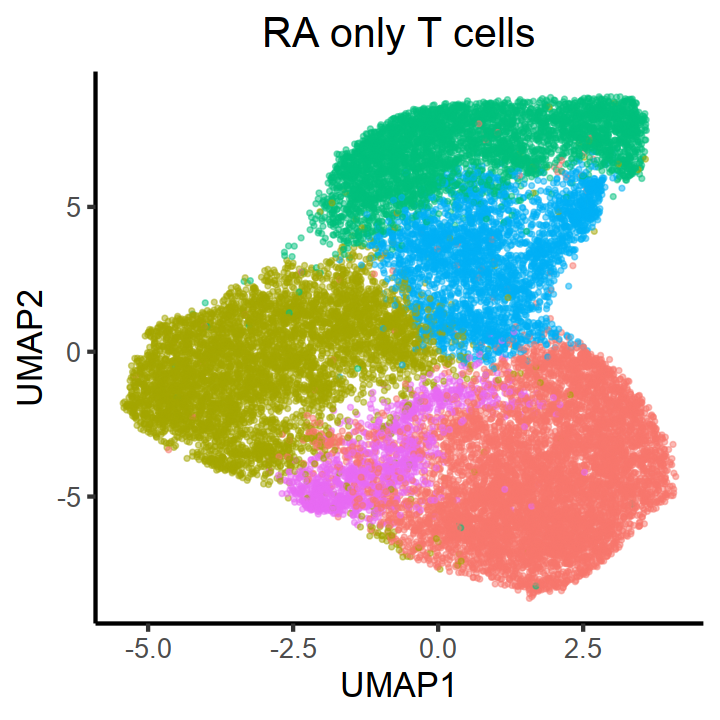

In [7]:
#Fig S8a left

Tcell_cluster_colors <- hue_pal()(length(unique(Tcell_ra[,Tcell_res])))
names(Tcell_cluster_colors) <- sort(unique(Tcell_ra[,Tcell_res]))

options(repr.plot.height=6,repr.plot.width=6)
g <- ggplot(Tcell_ra,aes_string(x='UMAP1',y='UMAP2',color=Tcell_res)) + 
        geom_point(size=1,alpha=0.5) + theme_classic(base_size=20) + scale_color_manual(values=Tcell_cluster_colors) + 
        theme(legend.position="none") +
        ggtitle('RA only T cells') + theme(plot.title = element_text(hjust = 0.5))
print(g)

df <- Tcell_ra[,c('UMAP1','UMAP2',Tcell_res)]
colnames(df) <- c('UMAP1','UMAP2',paste('RA only T cell',Tcell_res))

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,'Tcell_RAonly_reclustering_UMAP',file_extension),
           plot=g,units='in',height=6,width=6,dpi=600)
    write.table(df,paste(sep='',save_dir,'Tcell_RAonly_reclustering_UMAP',data_extension),
                sep='\t',col.name=TRUE,row.name=FALSE,quote=FALSE)
}

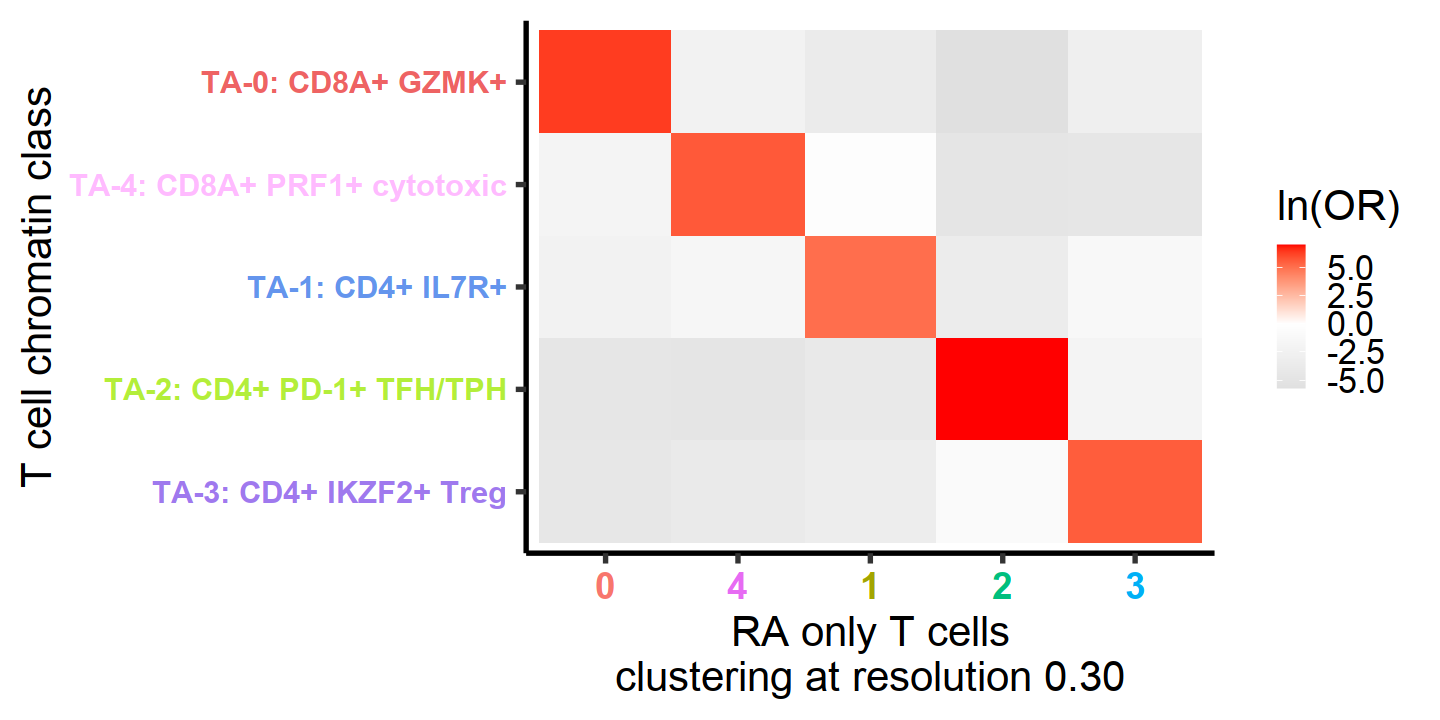

In [8]:
#Fig S8a right

Tcell_fisher_df <- calc_OR(Tcell_ra, Tcell_res, 'class_name')

g <- plot_OR(Tcell_fisher_df, Tcell_res, 'class_name',
             paste('RA only T cells\nclustering at resolution',str_split_fixed(Tcell_res,'_',2)[,2]),
             'T cell chromatin class',
             Tcell_ra_order, Tcell_class_order,clustColors=c(ATAC_colors,Tcell_cluster_colors))
g <- g + theme(axis.text.x=element_text(size=22),axis.text.y=element_text(size=18))

options(repr.plot.height=6,repr.plot.width=12)
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,save_dir,'Tcell_RAonly_reclustering_OR_heatmap',file_extension),
                            plot=g,units='in',height=6,width=12,dpi=600)

## Stromal

In [9]:
stromal_res <- 'hres_0.25'
if(!(stromal_res %in% colnames(stromal_ra))) stop('cluster resolution not in df')

In [10]:
stromal_class_abbr_order <- c('SA-1','SA-2','SA-0','SA-3')
stromal_class_order <- full_order_from_abbr(stromal_ra,'class_abbr','class_name',stromal_class_abbr_order)
if(!all(stromal_class_order %in% unique(stromal_ra$class_name))) stop('class name issue')

stromal_ra_order <- c(0,3,4,1,2,5)
if(!all(stromal_ra_order %in% unique(stromal_ra[,stromal_res]))) stop('cluster order insufficient')

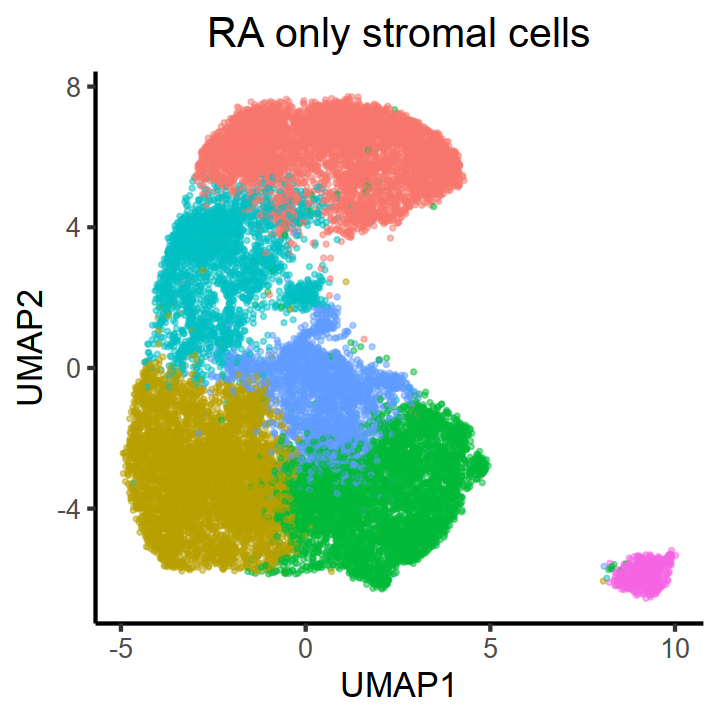

In [11]:
#Fig S8b left

stromal_cluster_colors <- hue_pal()(length(unique(stromal_ra[,stromal_res])))
names(stromal_cluster_colors) <- sort(unique(stromal_ra[,stromal_res]))

options(repr.plot.height=6,repr.plot.width=6)
g <- ggplot(stromal_ra,aes_string(x='UMAP1',y='UMAP2',color=stromal_res)) + 
        geom_point(size=1,alpha=0.5) + theme_classic(base_size=20) + scale_color_manual(values=stromal_cluster_colors) + 
        theme(legend.position="none") +
        ggtitle('RA only stromal cells') + theme(plot.title = element_text(hjust = 0.5))
print(g)

df <- stromal_ra[,c('UMAP1','UMAP2',stromal_res)]
colnames(df) <- c('UMAP1','UMAP2',paste('RA only stromal',stromal_res))

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,'stromal_RAonly_reclustering_UMAP',file_extension),
           plot=g,units='in',height=6,width=6,dpi=600)
    write.table(df,paste(sep='',save_dir,'stromal_RAonly_reclustering_UMAP',data_extension),
                sep='\t',col.name=TRUE,row.name=FALSE,quote=FALSE)
}

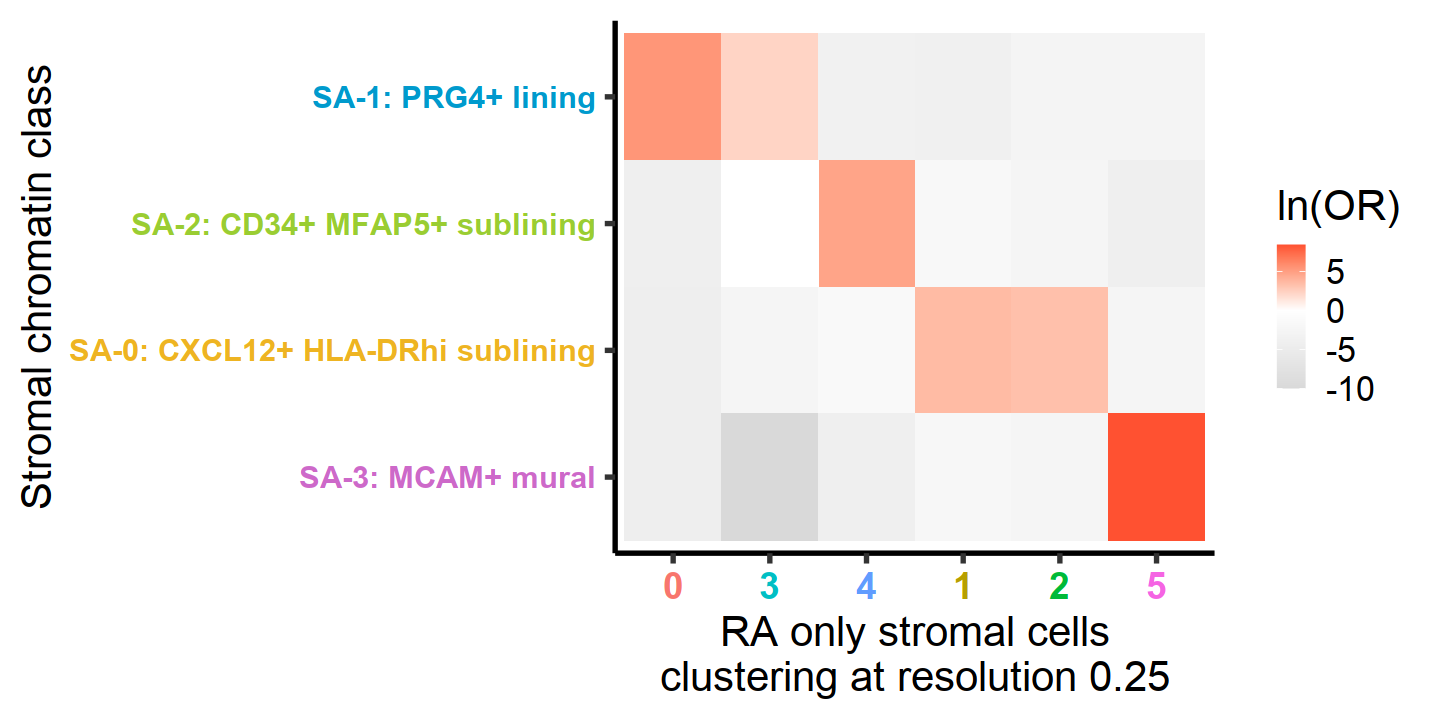

In [12]:
#Fig S8b right

stromal_fisher_df <- calc_OR(stromal_ra, stromal_res, 'class_name')

g <- plot_OR(stromal_fisher_df, stromal_res, 'class_name',
             paste('RA only stromal cells\nclustering at resolution',str_split_fixed(stromal_res,'_',2)[,2]),
             'Stromal chromatin class',
             stromal_ra_order, stromal_class_order,clustColors=c(ATAC_colors,stromal_cluster_colors))
g <- g + theme(axis.text.x=element_text(size=22),axis.text.y=element_text(size=18))

options(repr.plot.height=6,repr.plot.width=12)
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,save_dir,'stromal_RAonly_reclustering_OR_heatmap',file_extension),
                            plot=g,units='in',height=6,width=12,dpi=600)

## B/plasma

In [13]:
Bplasma_res <- 'hres_0.60'
if(!(Bplasma_res %in% colnames(Bplasma_hcc))) stop('cluster resolution not in df')

In [14]:
Bplasma_class_abbr_order <- c('BA-3','BA-4','BA-2','BA-5','BA-0','BA-1')
Bplasma_class_order <- full_order_from_abbr(Bplasma_hcc,'class_abbr','class_name',Bplasma_class_abbr_order)
if(!all(Bplasma_class_order %in% unique(Bplasma_hcc$class_name))) stop('class name issue')

Bplasma_hcc_order <- c(3,4,2,6,0,5,1)
if(!all(Bplasma_hcc_order %in% unique(Bplasma_hcc[,Bplasma_res]))) stop('cluster order insufficient')

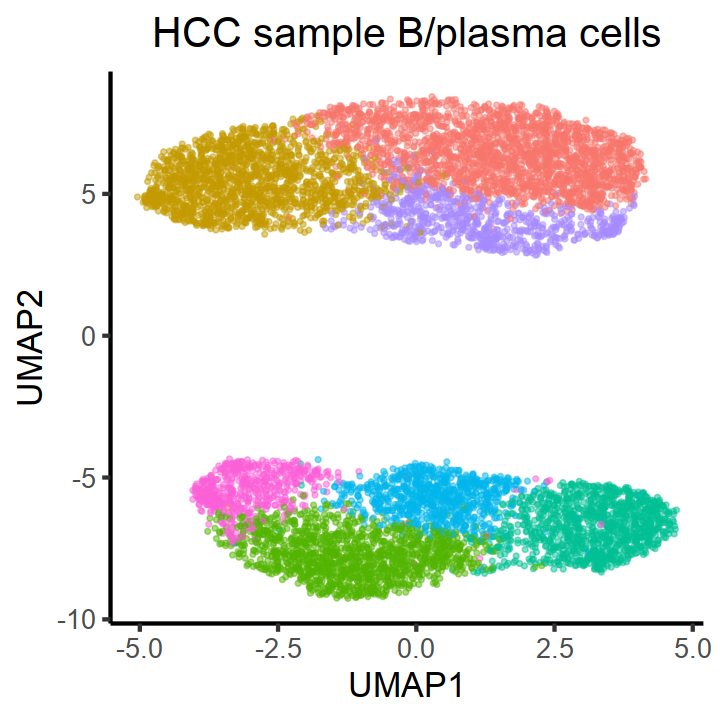

In [15]:
#Fig S8c left

Bplasma_cluster_colors <- hue_pal()(length(unique(Bplasma_hcc[,Bplasma_res])))
names(Bplasma_cluster_colors) <- sort(unique(Bplasma_hcc[,Bplasma_res]))

options(repr.plot.height=6,repr.plot.width=6)
g <- ggplot(Bplasma_hcc,aes_string(x='UMAP1',y='UMAP2',color=Bplasma_res)) + 
        geom_point(size=1,alpha=0.5) + theme_classic(base_size=20) + scale_color_manual(values=Bplasma_cluster_colors) + 
        theme(legend.position="none") +
        ggtitle('HCC sample B/plasma cells') + theme(plot.title = element_text(hjust = 0.5))
print(g)

df <- Bplasma_hcc[,c('UMAP1','UMAP2',Bplasma_res)]
colnames(df) <- c('UMAP1','UMAP2',paste('HCC sample Bplasma',Bplasma_res))

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,'Bplasma_highCC_reclustering_UMAP',file_extension),
           plot=g,units='in',height=6,width=6,dpi=600)
    write.table(df,paste(sep='',save_dir,'Bplasma_highCC_reclustering_UMAP',data_extension),
                sep='\t',col.name=TRUE,row.name=FALSE,quote=FALSE)
}

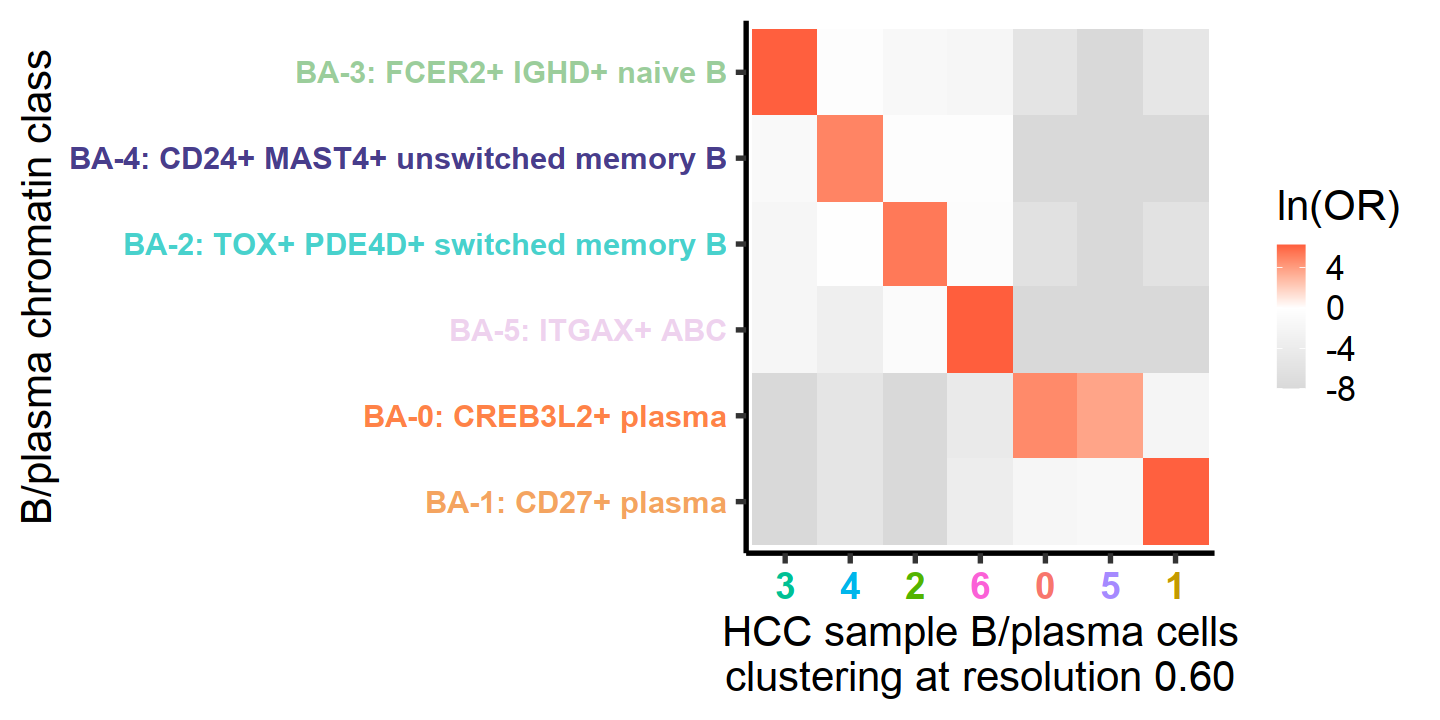

In [16]:
#Fig S8c right

Bplasma_fisher_df <- calc_OR(Bplasma_hcc, Bplasma_res, 'class_name')

g <- plot_OR(Bplasma_fisher_df, Bplasma_res, 'class_name',
             paste('HCC sample B/plasma cells\nclustering at resolution',str_split_fixed(Bplasma_res,'_',2)[,2]),
             'B/plasma chromatin class',
             Bplasma_hcc_order, Bplasma_class_order,clustColors=c(ATAC_colors,Bplasma_cluster_colors))
g <- g + theme(axis.text.x=element_text(size=22),axis.text.y=element_text(size=18))

options(repr.plot.height=6,repr.plot.width=12)
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,save_dir,'Bplasma_highCC_reclustering_OR_heatmap',file_extension),
                            plot=g,units='in',height=6,width=12,dpi=600)

## Endothelial

In [17]:
endothelial_res <- 'hres_0.40'
if(!(endothelial_res %in% colnames(endothelial_hcc))) stop('cluster resolution not in df')

In [18]:
endothelial_class_abbr_order <- c('EA-2','EA-3','EA-0','EA-1')
endothelial_class_order <- full_order_from_abbr(endothelial_hcc,'class_abbr','class_name',endothelial_class_abbr_order)
if(!all(endothelial_class_order %in% unique(endothelial_hcc$class_name))) stop('class name issue')

endothelial_hcc_order <- c(2,3,1,0)
if(!all(endothelial_hcc_order %in% unique(endothelial_hcc[,endothelial_res]))) stop('cluster order insufficient')

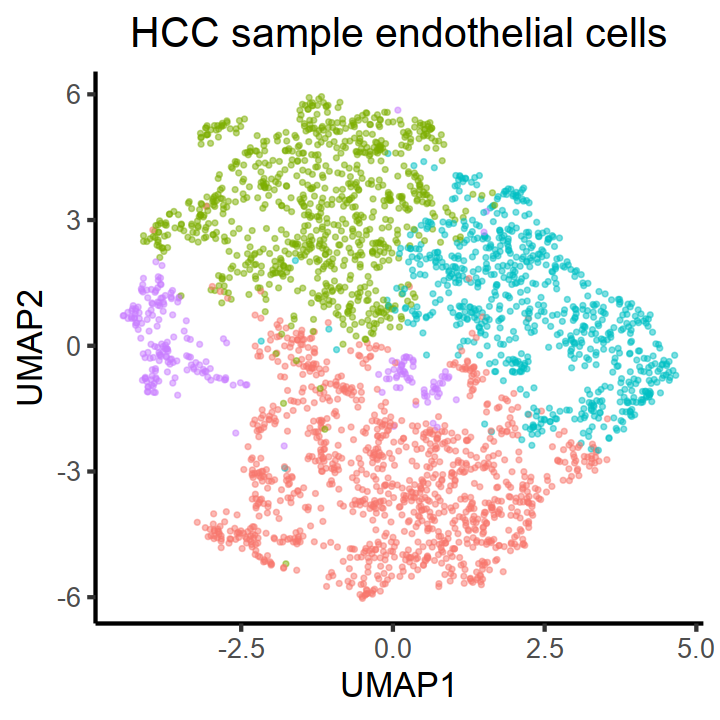

In [19]:
#Fig S8d left

endothelial_cluster_colors <- hue_pal()(length(unique(endothelial_hcc[,endothelial_res])))
names(endothelial_cluster_colors) <- sort(unique(endothelial_hcc[,endothelial_res]))

options(repr.plot.height=6,repr.plot.width=6)
g <- ggplot(endothelial_hcc,aes_string(x='UMAP1',y='UMAP2',color=endothelial_res)) + 
        geom_point(size=1,alpha=0.5) + theme_classic(base_size=20) + scale_color_manual(values=endothelial_cluster_colors) + 
        theme(legend.position="none") +
        ggtitle('HCC sample endothelial cells') + theme(plot.title = element_text(hjust = 0.5))
print(g)

df <- endothelial_hcc[,c('UMAP1','UMAP2',endothelial_res)]
colnames(df) <- c('UMAP1','UMAP2',paste('HCC sample endothelial',endothelial_res))

if(!is.na(save_dir)){
    ggsave(file=paste(sep='',save_dir,'endothelial_highCC_reclustering_UMAP',file_extension),
           plot=g,units='in',height=6,width=6,dpi=600)
    write.table(df,paste(sep='',save_dir,'endothelial_highCC_reclustering_UMAP',data_extension),
                sep='\t',col.name=TRUE,row.name=FALSE,quote=FALSE)
}

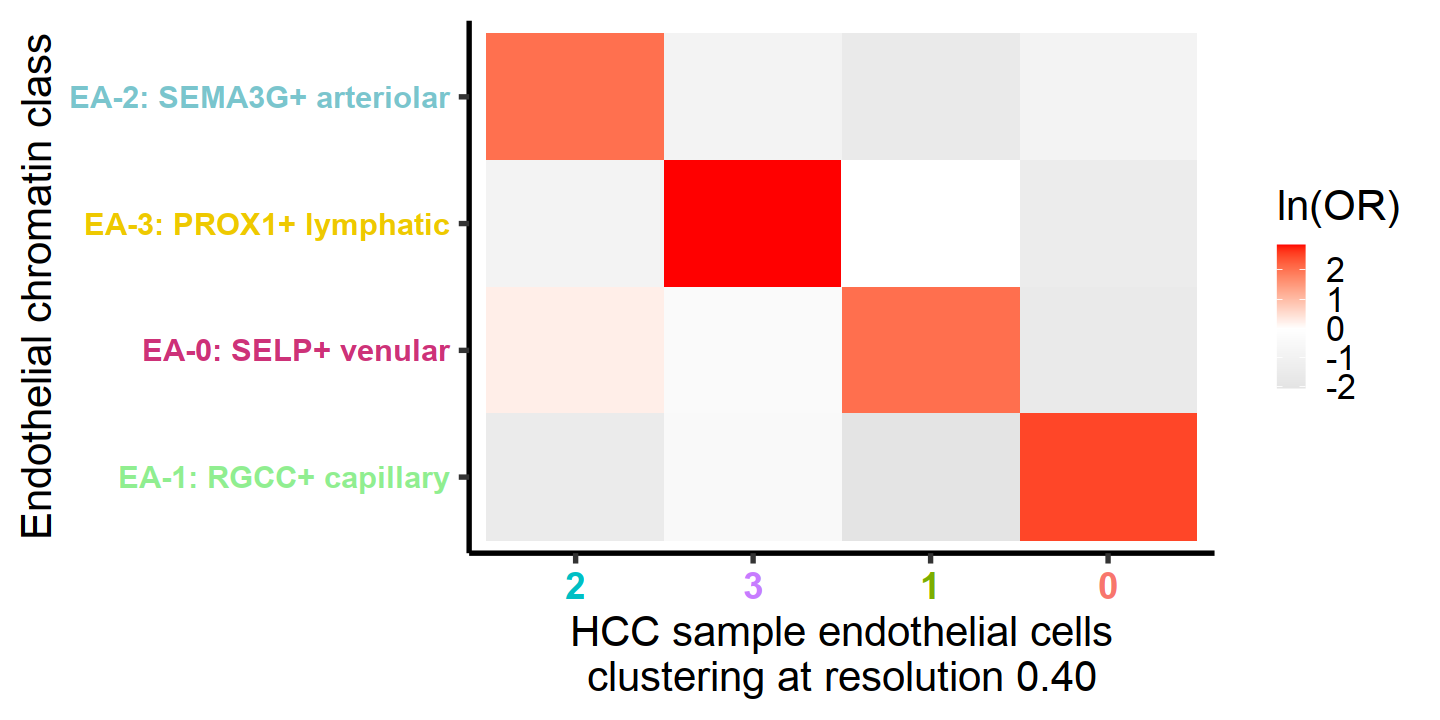

In [20]:
#Fig S8d right

endothelial_fisher_df <- calc_OR(endothelial_hcc, endothelial_res, 'class_name')

g <- plot_OR(endothelial_fisher_df, endothelial_res, 'class_name',
             paste('HCC sample endothelial cells\nclustering at resolution',str_split_fixed(endothelial_res,'_',2)[,2]),
             'Endothelial chromatin class',
             endothelial_hcc_order, endothelial_class_order,clustColors=c(ATAC_colors,endothelial_cluster_colors))
g <- g + theme(axis.text.x=element_text(size=22),axis.text.y=element_text(size=18))

options(repr.plot.height=6,repr.plot.width=12)
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,save_dir,'endothelial_highCC_reclustering_OR_heatmap',file_extension),
                            plot=g,units='in',height=6,width=12,dpi=600)

## Session Info

In [21]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server release 6.5 (Santiago)

Matrix products: default
BLAS/LAPACK: /PHShome/kew47/miniconda3/lib/R/lib/libRblas.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] repr_1.0.1         gridExtra_2.3      RColorBrewer_1.1-2 scales_1.1.1      
 [5] viridis_0.5.1      viridisLite_0.3.0  ggrepel_0.8.2      ggrastr_0.2.3     
 [9] tidyr_1.0.3        stringr_1.4.0      ggpubr_0.4.0       ggplot2_3.3.0     
[13] presto_1.0.0       Rcpp_1.0.4.6       ROCR_1.0-7         gplots_3.0.1.1    
[17] Rmisc_1.5.1        plyr_1.8.6         lattice_0.20-41    gtools_3.8.2      
[21] Matrix_1.2-18     

loaded via a namespace (and not attached):
 [1] digest_0.6.25       IRdisplay_0.7.0     R6_2.4.1           
 [4] cellranger_1.1.0    backports_1.1.6     evaluate_0.14      
